<a href="https://colab.research.google.com/github/AnaKarenDRIV/FinanzasUniversitarias/blob/main/RED%20NEURONAL%20MULTI%20CAPA%20/%20XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2 parametros    4 datos
x₁          x₂        y = x₁ XOR x₂

0           0          0

0           1          1

1           0          1

1           1          0

In [1]:
import numpy as np

# Datos XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]]) ##Los datos los traduccimos a lenguaje computacional de la siguiente manera (4 minilistas)
y = np.array([[0],[1],[1],[0]])


Red neuronal multicapa

In [7]:


#Definir el modelo de red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(4, activation='relu', input_dim=2),
    Dense(1, activation='sigmoid')
])

                                                                #Se utiliza Sequential para definir el modelo de red neuronal.
                                                                #Se añaden capas de entrada y ocultas densamente conectadas (Dense) con activación
                                                                #ReLU y una capa de salida con activación sigmoide para clasificar la respuesta en 1 y 0 (2 clases).

##Compilar el modelo

Crear un optimizador Adam con una tasa de aprendizaje del 0.01

In [8]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.01
adam_optimizer = Adam(learning_rate=learning_rate)


In [9]:
modelo.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Se compila el modelo utilizando el optimizador Adam y la función de pérdida de entropía cruzada categórica dispersa (binary_crossentropy) para la clasificación.

También se puede usar directamente el nombre del optimizador ('adam') en el argumento optimizer de la función compile. En lugar de definir un optimizador personalizado.

In [16]:
history = modelo.fit(
    X, y,
    epochs=100,
    verbose=1,
)
#Se entrena el modelo en los datos de entrenamiento utilizando fit. Se especifica el número de épocas a realizar durante el entrenamiento.

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.2171
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.2142
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.2107
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.2079
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.2053
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.2024
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.1994
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.1969
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.1943
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.1917
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 0.1891
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - lo

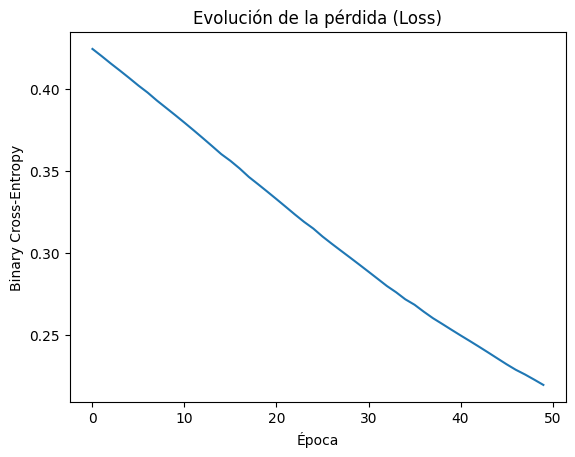

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Evolución de la pérdida (Loss)')
plt.xlabel('Época')
plt.ylabel('Binary Cross-Entropy')
plt.show()
#Gráficando la funcion de pérdida(monotona decreciente y por ende tiene aprendisaje)

In [14]:
#Evaluar el modelo en el conjunto de prueba

loss, accuracy = modelo.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 1.0000 - loss: 0.2171
Loss: 0.21710486710071564, Accuracy: 1.0


#Predicción

Hacer predicciones y comparar las predicciones con los valores reales

In [15]:
pred = (modelo.predict(X) > 0.5).astype(int)
for i, (inp, p) in enumerate(zip(X, pred)):
    print(f"{inp} -> {p[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 0
